In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.express as px

In [ ]:
medical_df = pd.read_csv('../data/medical-charges.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
medical_df.info()

NameError: name 'medical_df' is not defined

In [4]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [6]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [7]:
fig = px.histogram(medical_df, x='age', 
                   marginal= 'box',
                   nbins=47,
                    title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [8]:
fig = px.histogram(medical_df, 
                   x='bmi',
                   marginal= 'box',
                   color_discrete_sequence=['red'],
                    title='Distribution of BMI(Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [9]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal= 'box',
                   color='region',
                   color_discrete_sequence=['blue', 'red', 'green', 'gray'],
                    title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [10]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [11]:
fig = px.histogram(medical_df, x='smoker',
                   color = 'sex',
                   marginal= 'box',
                    title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
fig = px.scatter(medical_df, 
                   x='age',
                   y='charges', 
                   color='smoker',
                   opacity=0.8,
                   hover_data=['sex'],
                    title='Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [13]:
fig = px.scatter(medical_df,
                x= 'bmi',
                y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex'],
                title='BMI vs Charges')

fig.update_traces(marker_size=5)
fig.show()

In [14]:
px.violin(medical_df, x='children', y='charges')

## Correlation

In [15]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [16]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

In [17]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)


np.float64(0.787251430498478)

In [18]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Text(0.5, 1.0, 'Correlation Matrix')

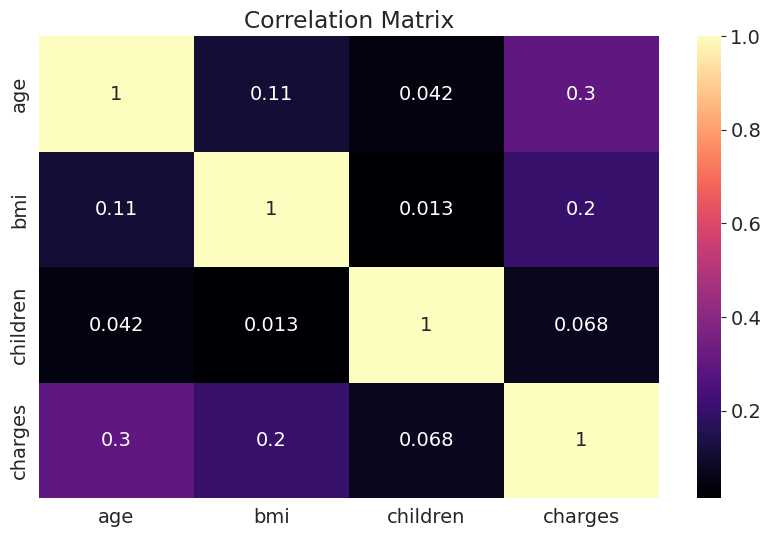

In [19]:
sns.heatmap(medical_df.corr(numeric_only='int', method='pearson'), cmap='magma', annot=True)
plt.title('Correlation Matrix')

## Linear Regressioin using a Single Feature

In [20]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

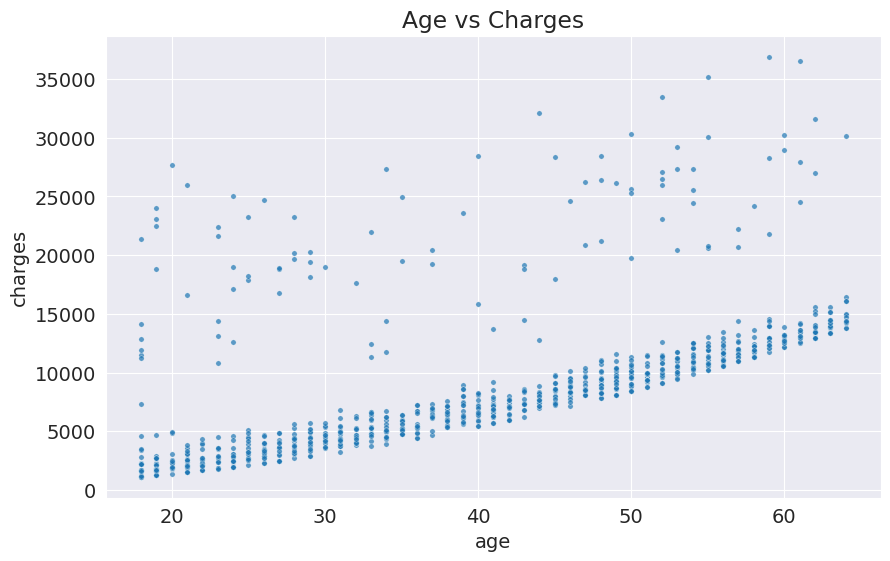

In [21]:
plt.title('Age vs Charges')
sns.scatterplot(non_smoker_df, x='age', y='charges', alpha=0.7, s=15    )

## Basic Modelling

![0]

[0]:

In [22]:
"""
this is our first machine learning model
zlinear regression modelling
"""

def estimate_charges(age, w, b):
    return w * age + b

In [23]:
w = 50
b =100

In [24]:
estimate_charges(40, w, b)

2100

In [25]:
ages = non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [26]:
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [27]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Text(0, 0.5, 'Estimated Chrges')

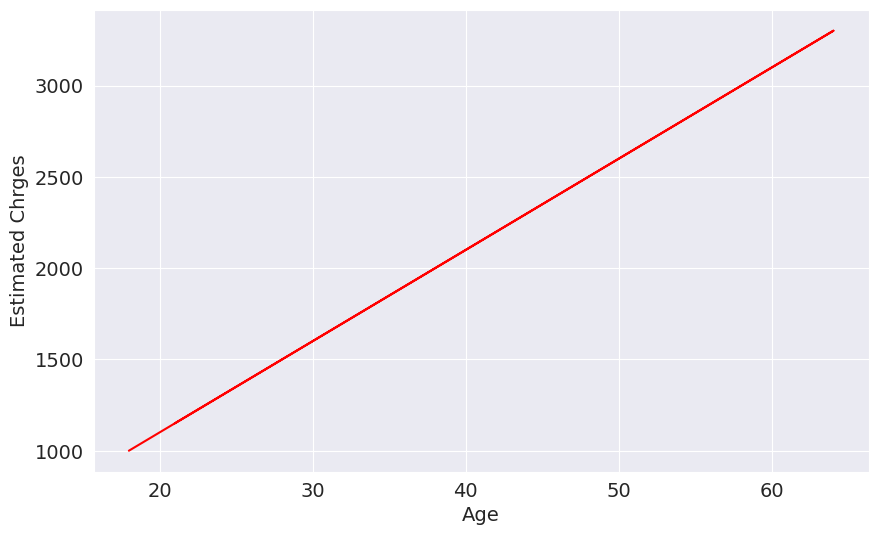

In [28]:
plt.plot(ages, estimated_charges, 'r-')
plt.xlabel('Age')
plt.ylabel('Estimated Chrges')

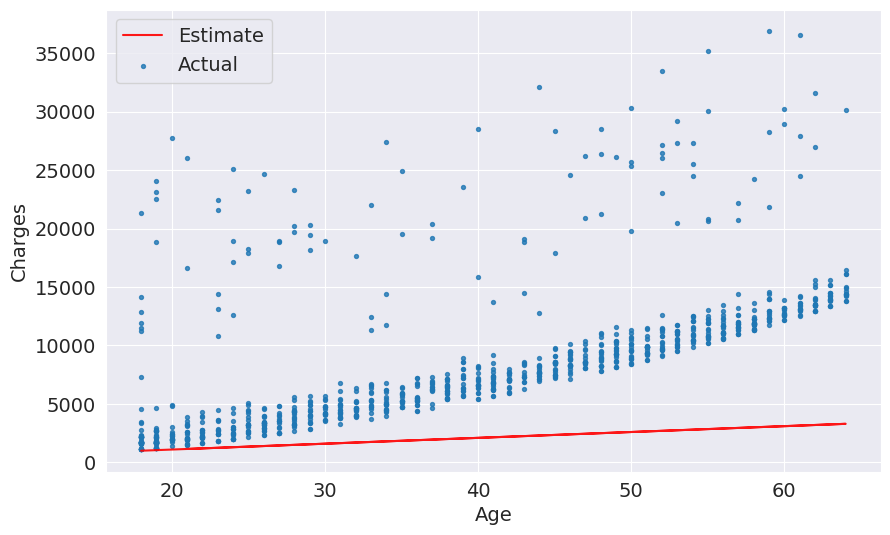

In [29]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9)
plt.scatter(ages,target, s=8, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])
plt.show()

In [30]:
def try_parameters(w,b):
    ages = non_smoker_df.age
    target= non_smoker_df.charges
    
    estimated_charges= estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])
    plt.show()

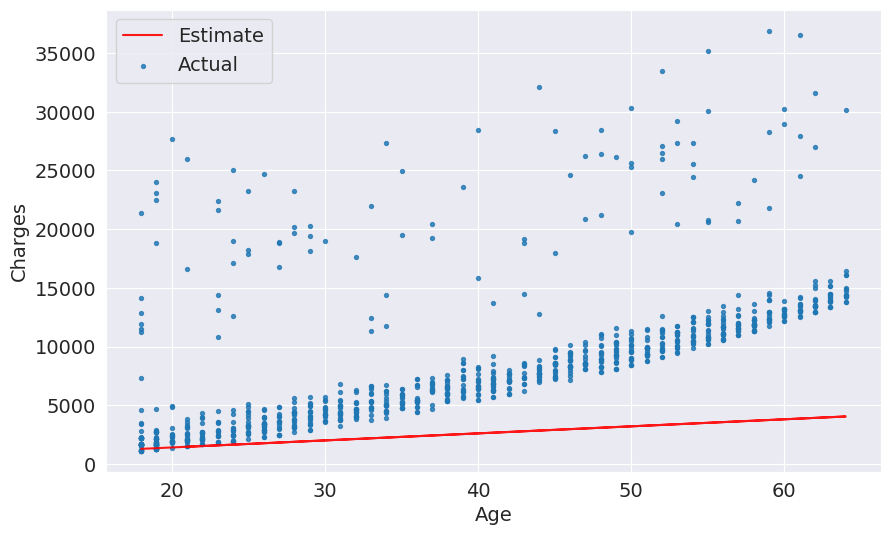

In [31]:
try_parameters(60, 200)

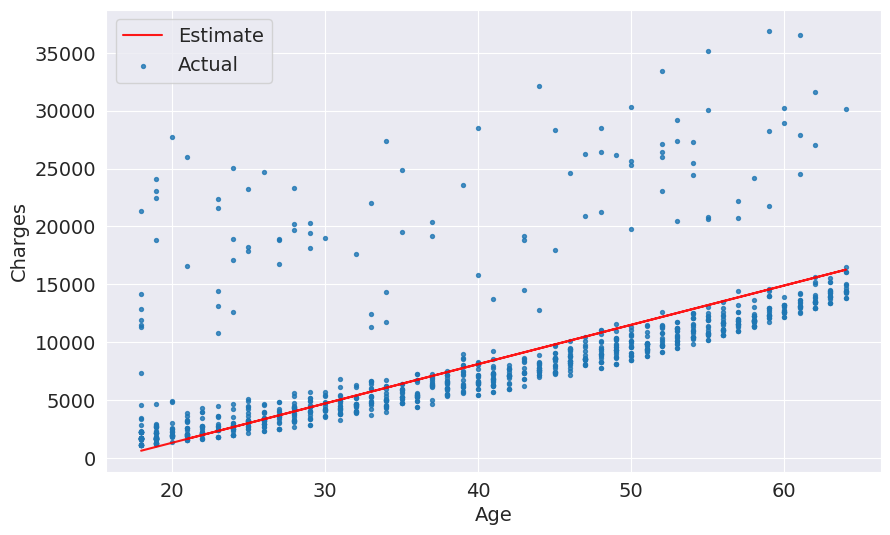

In [32]:
try_parameters(340, -5500)

## Loss Function 

![0]

[0]: images/lossFuncDef.png

In [33]:
"""
RMSE is root mean sqr error 
this is the loss function for machine learning models 
basically to see how mad your models is.
"""

def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [34]:
non_smoker_df.age

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [35]:
w =50
b= 100

In [36]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [37]:
rmse(targets, predicted)

np.float64(8461.949562575493)

In [38]:
def try_parameters(w,b):
    ages = non_smoker_df.age
    target= non_smoker_df.charges
    predicted = estimated_charges= estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])
    
    loss = rmse(targets, predicted)
    plt.show()
    print("RMSE LOSS: ", loss)

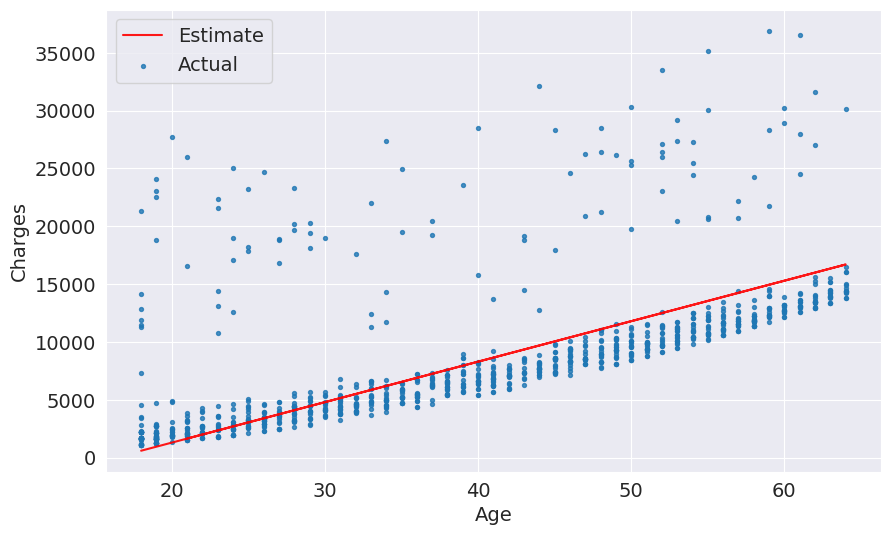

RMSE LOSS:  4818.502020532258


In [39]:
try_parameters(350, -5700)

## linear Regression model

![0]

[0]: images/optimage.png

In [40]:
model = LinearRegression()

In [41]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [42]:
inputs = non_smoker_df[['age']]# needs to be a 1dimensional array
targets = non_smoker_df.charges
print("imputes..shape; ", inputs.shape)
print("targets.shape: ", targets.shape)

imputes..shape;  (1064, 1)
targets.shape:  (1064,)


In [43]:
model.fit(inputs, targets)

LinearRegression()

In [44]:
model.predict([[23],
               [37],
               [61]])

/home/juto/Desktop/ML_libraries/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [45]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [46]:
rmse(targets, predictions)

np.float64(4662.505766636395)

In [47]:
model.coef_

array([267.24891283])

In [48]:
model.intercept_

np.float64(-2091.4205565650864)

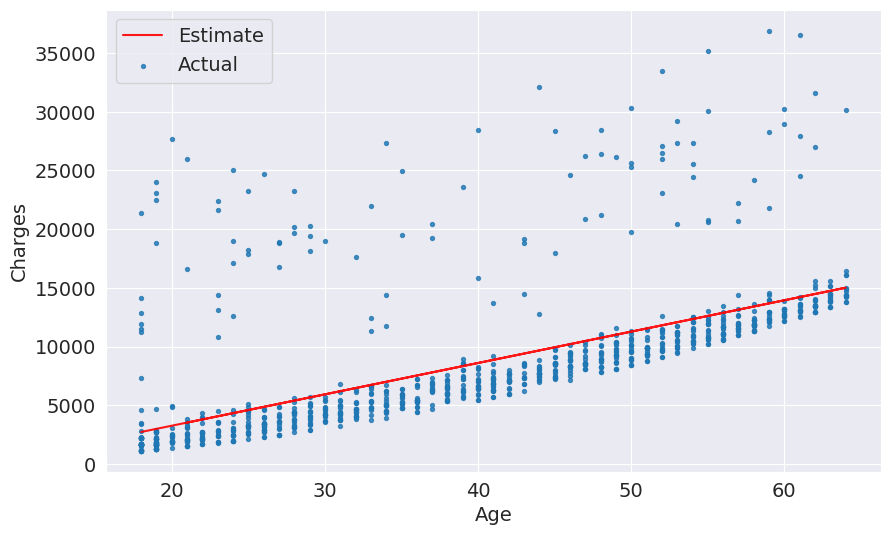

RMSE LOSS:  4662.505766636395


In [49]:
try_parameters(model.coef_, model.intercept_)

## Using The SGDRegressor

![0]

[0]: images/exercise1.png

In [50]:
from sklearn.linear_model import SGDRegressor

In [51]:
model = SGDRegressor()

In [52]:
model.fit(inputs, targets)

SGDRegressor()

In [53]:
predictions = model.predict(inputs)
predictions

array([ 877.98522259, 3915.26178099, 5433.90006019, ...,  877.98522259,
        877.98522259, 1789.16819011])

In [54]:
rmse(targets, predictions)

np.float64(4809.188229324427)

In [55]:
model.coef_

array([303.72765584])

In [56]:
model.intercept_

array([-4589.11258253])

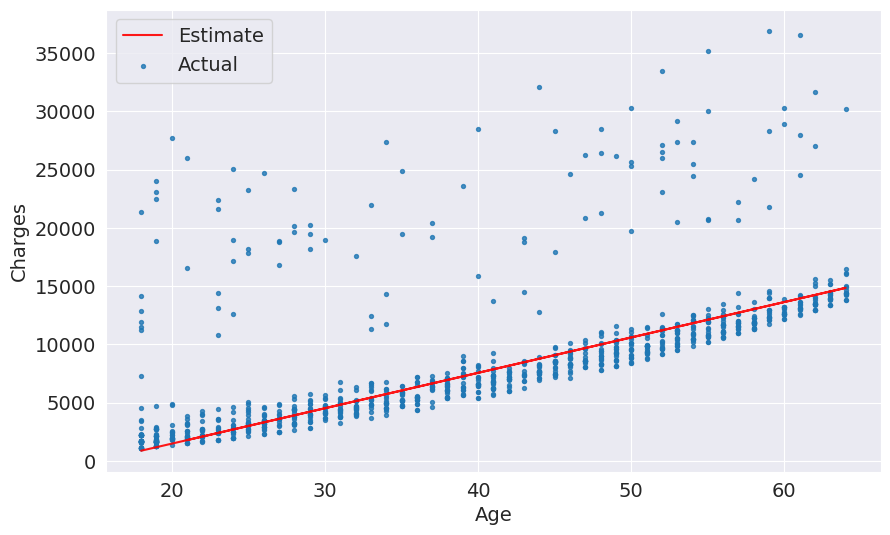

RMSE LOSS:  4809.188229324427


In [57]:
try_parameters(model.coef_, model.intercept_)

### shorthand for modelling

In [58]:
# Create inputs and targets 
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute the loss to evaluate the model

loss = rmse(targets, predictions)
print('LOSS: ', loss) 

LOSS:  4662.505766636395


![0]

[0]:images/mlDiagram.png

![1]


[1]:  images/mlDef.png

## Linear Regression using Multiple Features

In [59]:
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [60]:
# Create inputs and targets 
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute the loss to evaluate the model

loss = rmse(targets, predictions)
print('LOSS: ', loss) 

LOSS:  4662.3128354612945


In [61]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

np.float64(0.0840365431283327)

In [62]:
fig = px.scatter(non_smoker_df,
                 x='bmi',
                 y='charges',
                 title='BMI vs Charges'
)

fig.update_traces(marker_size=5)
fig.show()

In [63]:
non_smoker_df.charges.corr(non_smoker_df.children)

np.float64(0.13892870453542192)

In [64]:
fig = px.scatter(non_smoker_df,
                 x='children',
                 y='charges',
                 title= 'children vs Charges'
)

fig.show()

In [65]:
# Create inputs and targets 
inputs, targets = non_smoker_df[['age', 'children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute the loss to evaluate the model

loss = rmse(targets, predictions)
print('LOSS: ', loss) 

LOSS:  4608.579056261982


## Using Categorical Features for machine  Learning 

![0]

[0]: images/catFeaturesDef.png

### binary categories

In [66]:
medical_df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

<Axes: xlabel='smoker', ylabel='charges'>

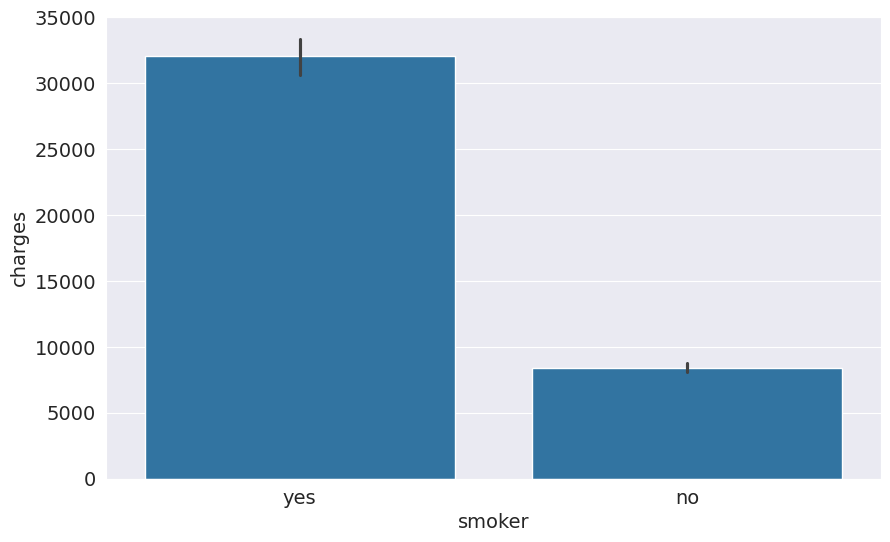

In [67]:
# colors = {'yes':'blue','no':'orange'}

sns.barplot(data=medical_df, 
             x='smoker', 
             y='charges', 
            #  color= colors
)
 

In [68]:
smoker_codes= {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [69]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [70]:
medical_df.charges.corr(medical_df['smoker_code'])

np.float64(0.787251430498478)

In [71]:
fig = px.scatter(medical_df,
                 x='smoker_code',
                 y='charges',
                 title= 'children vs Charges'
)

fig.show()

In [72]:
# Create inputs and targets 
inputs, targets = medical_df[['age', 'bmi', 'children','smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute the loss to evaluate the model

loss = rmse(targets, predictions)
print('LOSS: ', loss) 

LOSS:  6056.439217188081


In [73]:
sex_code = {'female':0, 'male':1}
medical_df['sex_code'] = medical_df.sex.map(sex_code) 

In [74]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [75]:
medical_df.charges.corr(medical_df['sex_code'])

np.float64(0.057292062202025484)

In [76]:
fig = px.scatter(medical_df,
                 x='sex_code',
                 y='charges',
                 title= 'children vs Charges'
)

fig.show()

In [77]:
# Create inputs and targets 
inputs, targets = medical_df[['age', 'bmi', 'children','smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute the loss to evaluate the model

loss = rmse(targets, predictions)
print('LOSS: ', loss) 

LOSS:  6056.100708754546


### One-hot Encoding

![0]

[0]: images/onehotencode.png

<Axes: xlabel='region', ylabel='charges'>

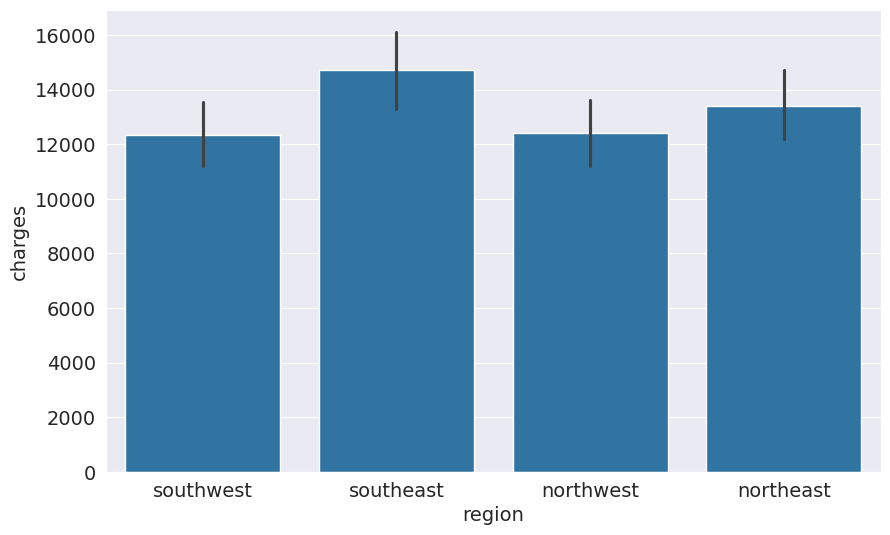

In [78]:
# fig = px.bar(medical_df, x='region', y='charges')

sns.barplot(data=medical_df, x='region', y='charges')

In [79]:
from sklearn import preprocessing

enc = preprocessing.OneHotEncoder()
help(enc)

Help on OneHotEncoder in module sklearn.preprocessing._encoders object:

class OneHotEncoder(_BaseEncoder)
 |  OneHotEncoder(*, categories='auto', drop=None, sparse_output=True, dtype=<class 'numpy.float64'>, handle_unknown='error', min_frequency=None, max_categories=None, feature_name_combiner='concat')
 |  
 |  Encode categorical features as a one-hot numeric array.
 |  
 |  The input to this transformer should be an array-like of integers or
 |  strings, denoting the values taken on by categorical (discrete) features.
 |  The features are encoded using a one-hot (aka 'one-of-K' or 'dummy')
 |  encoding scheme. This creates a binary column for each category and
 |  returns a sparse matrix or dense array (depending on the ``sparse_output``
 |  parameter).
 |  
 |  By default, the encoder derives the categories based on the unique values
 |  in each feature. Alternatively, you can also specify the `categories`
 |  manually.
 |  
 |  This encoding is needed for feeding categorical data 

In [80]:
enc.fit(medical_df[['region']])
help(enc.fit)

Help on method fit in module sklearn.preprocessing._encoders:

fit(X, y=None) method of sklearn.preprocessing._encoders.OneHotEncoder instance
    Fit OneHotEncoder to X.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        The data to determine the categories of each feature.
    
    y : None
        Ignored. This parameter exists only for compatibility with
        :class:`~sklearn.pipeline.Pipeline`.
    
    Returns
    -------
    self
        Fitted encoder.



In [81]:
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [82]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [83]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [84]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


![0]

[0]: images/regmodeldef1.png

In [85]:
# Create inputs and targets 
input_cols = ['age', 'bmi', 'children','smoker_code', 'sex_code','northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute the loss to evaluate the model

loss = rmse(targets, predictions)
print('LOSS: ', loss) 

LOSS:  6041.6796511744515


In [86]:
medical_df[input_cols].loc[10]

age            25.00
bmi            26.22
children        0.00
smoker_code     0.00
sex_code        1.00
northeast       1.00
northwest       0.00
southeast       0.00
southwest       0.00
Name: 10, dtype: float64

In [87]:
model.predict([[28, 30, 2, 1, 0, 0, 1, 0, 0.]])

/home/juto/Desktop/ML_libraries/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([29875.81463599])

## model Improvements


![0]

[0]: images/regmodeldef2.png

In [88]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [89]:
model.intercept_

np.float64(-12525.547811195444)

In [90]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [91]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols,1),
    'weight':np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


![0]

[0]: images/scale2.png

![1]

[1]: images/scale1.png

In [92]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
help(scaler)

Help on StandardScaler in module sklearn.preprocessing._data object:

class StandardScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  StandardScaler(*, copy=True, with_mean=True, with_std=True)
 |  
 |  Standardize features by removing the mean and scaling to unit variance.
 |  
 |  The standard score of a sample `x` is calculated as:
 |  
 |      z = (x - u) / s
 |  
 |  where `u` is the mean of the training samples or zero if `with_mean=False`,
 |  and `s` is the standard deviation of the training samples or one if
 |  `with_std=False`.
 |  
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using
 |  :meth:`transform`.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual fea

In [95]:
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [96]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [97]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

We can nows scale data as follows

In [98]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

These are now combined with the categprical data

In [99]:
cat_cols = ['smoker_code', 'sex_code','northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values
categorical_data

array([[1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.]])

In [100]:
# Create inputs and targets 
inputs, targets = np.concatenate((scaled_inputs, categorical_data), axis=1), medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute the loss to evaluate the model

loss = rmse(targets, predictions)
print('LOSS: ', loss) 

LOSS:  6041.6796511744515


In [101]:
print(inputs[0])

[-1.43876426 -0.45332    -0.90861367  1.          0.          0.
  0.          0.          1.        ]


In [102]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight':np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [103]:
new_customers = [[28, 30, 2, 1, 0, 0, 1, 0, 0.]]

In [104]:
scaler.transform([[28, 30, 2]])

/home/juto/Desktop/ML_libraries/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [105]:
model.predict([[-0.79795355, -0.10882659,  0.75107928, 1, 0, 0, 1, 0, 0.]])

array([29875.81463371])

![0]

[0]:images/Screenshot%20from%202024-09-20%2004-17-12.png

![1]

[1]: images/Screenshot%20from%202024-09-20%2004-17-33.png

## Creating a training and test set for reporting results

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [108]:
# Create and traian model
model = LinearRegression().fit(inputs_train, targets_train)
  
# Genearate predictions 
predictions_test = model.predict(inputs_test)

# Comput loss to evaluate the model 
loss = rmse(targets_test, predictions_test)
print('Test Loss: ', loss)

Test Loss:  6469.001222216034


Lets compare this with the training loss

In [109]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss', loss)

Training Loss 5995.101071445415


![0]

[0]: images/conclusion.png